QUALITY METRIC DESIGN FRAMEWORK

📊 Let's design your quality metric step-by-step

STEP 1: VARIABLE SELECTION
----------------------------------------

Based on the analysis, here are your variables grouped by category:

GROUP A: OUTCOME METRICS (Student Success)
  • Retention_Rate (92% for CWRU)
  • Grad_Rate_4yr (67% for CWRU)
  • Grad_Rate_5yr (84% for CWRU)
  • Grad_Rate_6yr (85% for CWRU)

GROUP B: INPUT METRICS (Educational Resources)
  • Research_Budget_Per_Student ($38,921 for CWRU)
  • Student_Faculty_Ratio (9:1 for CWRU)
  • Expense_Distribution_Research (42% for CWRU)

GROUP C: SELECTIVITY METRICS (Student Quality)
  • SAT_Scores (1490 for CWRU)
  • Acceptance_Rate (28% for CWRU)

🔍 KEY INSIGHTS FROM CORRELATION ANALYSIS:
  1. Graduation rates are HIGHLY correlated (r > 0.94)
     → Recommendation: Use only ONE (suggest 6-year)
  2. Acceptance_Rate strongly correlates with most quality metrics
     → Could be redundant with SAT_Scores
  3. Research_Budget_Per_Student is relat

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/quality_metric_design.png'

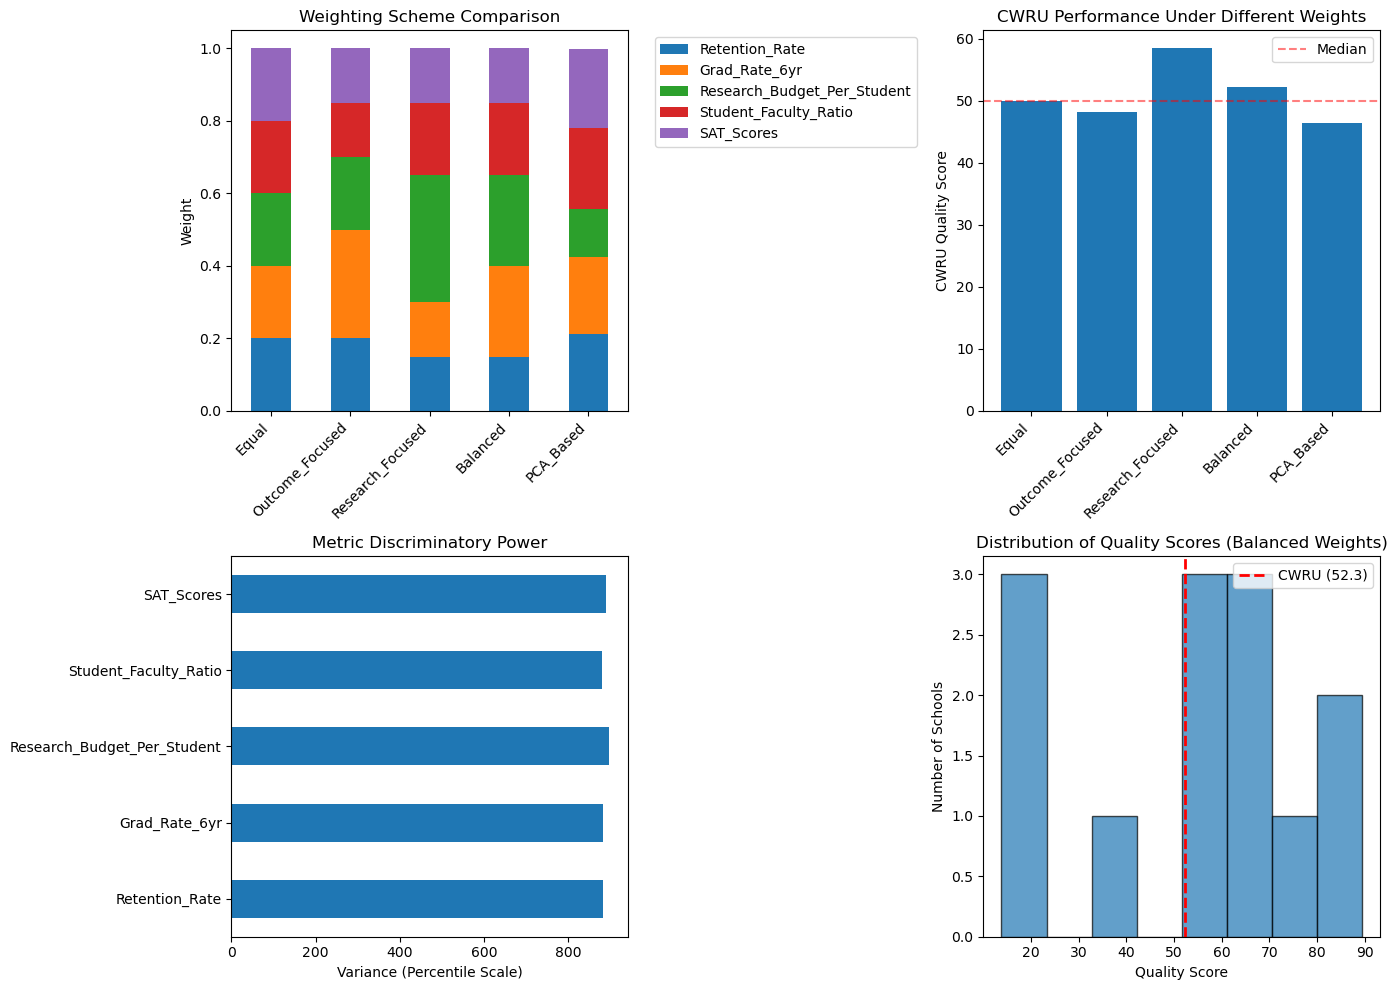

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load data
df = pd.read_excel('CWRU_Comparison_Data.xlsx', sheet_name='Sheet2')

print("="*60)
print("QUALITY METRIC DESIGN FRAMEWORK")
print("="*60)
print("\n📊 Let's design your quality metric step-by-step\n")

# ============================================
# STEP 1: VARIABLE SELECTION
# ============================================
print("STEP 1: VARIABLE SELECTION")
print("-" * 40)
print("\nBased on the analysis, here are your variables grouped by category:")
print("\nGROUP A: OUTCOME METRICS (Student Success)")
print("  • Retention_Rate (92% for CWRU)")
print("  • Grad_Rate_4yr (67% for CWRU)")  
print("  • Grad_Rate_5yr (84% for CWRU)")
print("  • Grad_Rate_6yr (85% for CWRU)")

print("\nGROUP B: INPUT METRICS (Educational Resources)")
print("  • Research_Budget_Per_Student ($38,921 for CWRU)")
print("  • Student_Faculty_Ratio (9:1 for CWRU)")
print("  • Expense_Distribution_Research (42% for CWRU)")

print("\nGROUP C: SELECTIVITY METRICS (Student Quality)")
print("  • SAT_Scores (1490 for CWRU)")
print("  • Acceptance_Rate (28% for CWRU)")

print("\n🔍 KEY INSIGHTS FROM CORRELATION ANALYSIS:")
print("  1. Graduation rates are HIGHLY correlated (r > 0.94)")
print("     → Recommendation: Use only ONE (suggest 6-year)")
print("  2. Acceptance_Rate strongly correlates with most quality metrics")
print("     → Could be redundant with SAT_Scores")
print("  3. Research_Budget_Per_Student is relatively independent")
print("     → Adds unique information to the index")

# ============================================
# STEP 2: DATA PREPROCESSING
# ============================================
print("\n" + "="*60)
print("STEP 2: DATA PREPROCESSING OPTIONS")
print("-" * 40)

# Handle outliers
print("\n📈 Outlier Analysis:")
print("Duke's research budget ($71,744) is 2.5 std devs above mean")
print("U Colorado's acceptance rate (83%) is 2.5 std devs above mean")

print("\nPreprocessing Options:")
print("A. Cap outliers at 95th percentile")
print("B. Use robust scaling (median/IQR)")
print("C. Log transform skewed variables")
print("D. Keep as-is (outliers represent real differences)")

# Let's show the impact of each approach
df_preprocessed = df.copy()

# Option A: Cap outliers
df_capped = df.copy()
for col in ['Research_Budget_Per_Student', 'Acceptance_Rate']:
    cap_value = df[col].quantile(0.95)
    df_capped[col] = df_capped[col].clip(upper=cap_value)

# Option B: Log transform research budget
df_log = df.copy()
df_log['Research_Budget_Per_Student_Log'] = np.log1p(df['Research_Budget_Per_Student'])

print("\nImpact on CWRU's research ranking:")
print(f"  Original: #{(df['Research_Budget_Per_Student'] > df[df['School_Name']=='Case Western Reserve University']['Research_Budget_Per_Student'].values[0]).sum() + 1}/13")
print(f"  Capped:   #{(df_capped['Research_Budget_Per_Student'] > df_capped[df_capped['School_Name']=='Case Western Reserve University']['Research_Budget_Per_Student'].values[0]).sum() + 1}/13")
print(f"  Log:      #{(df_log['Research_Budget_Per_Student_Log'] > df_log[df_log['School_Name']=='Case Western Reserve University']['Research_Budget_Per_Student_Log'].values[0]).sum() + 1}/13")

# ============================================
# STEP 3: NORMALIZATION STRATEGY
# ============================================
print("\n" + "="*60)
print("STEP 3: NORMALIZATION STRATEGY")
print("-" * 40)

# Create comparison of methods
metrics = ['Retention_Rate', 'Grad_Rate_6yr', 'Research_Budget_Per_Student', 
           'Student_Faculty_Ratio', 'SAT_Scores']

# Prepare different normalizations
norm_methods = {}

# Method 1: Percentile Ranking
norm_methods['Percentile'] = df[metrics].rank(pct=True) * 100
norm_methods['Percentile']['Student_Faculty_Ratio'] = 100 - norm_methods['Percentile']['Student_Faculty_Ratio']

# Method 2: Z-Score
scaler_z = StandardScaler()
norm_methods['Z-Score'] = pd.DataFrame(
    scaler_z.fit_transform(df[metrics]), 
    columns=metrics, index=df.index
)
norm_methods['Z-Score']['Student_Faculty_Ratio'] = -norm_methods['Z-Score']['Student_Faculty_Ratio']

# Method 3: Min-Max (0-1)
scaler_mm = MinMaxScaler()
norm_methods['Min-Max'] = pd.DataFrame(
    scaler_mm.fit_transform(df[metrics]), 
    columns=metrics, index=df.index
)
norm_methods['Min-Max']['Student_Faculty_Ratio'] = 1 - norm_methods['Min-Max']['Student_Faculty_Ratio']

# Method 4: Robust (Median/IQR)
scaler_robust = RobustScaler()
norm_methods['Robust'] = pd.DataFrame(
    scaler_robust.fit_transform(df[metrics]), 
    columns=metrics, index=df.index
)
norm_methods['Robust']['Student_Faculty_Ratio'] = -norm_methods['Robust']['Student_Faculty_Ratio']

print("\n🎯 Normalization Method Comparison for CWRU:")
cwru_idx = df['School_Name'] == 'Case Western Reserve University'

for method, data in norm_methods.items():
    cwru_scores = data.loc[cwru_idx].values[0]
    avg_score = cwru_scores.mean()
    print(f"\n{method}:")
    print(f"  Average normalized score: {avg_score:.2f}")
    print(f"  Best metric:  {metrics[np.argmax(cwru_scores)]} = {cwru_scores.max():.2f}")
    print(f"  Worst metric: {metrics[np.argmin(cwru_scores)]} = {cwru_scores.min():.2f}")

# ============================================
# STEP 4: WEIGHTING SCHEMES
# ============================================
print("\n" + "="*60)
print("STEP 4: WEIGHTING SCHEMES")
print("-" * 40)

# Define different weighting schemes
weights_equal = {
    'Retention_Rate': 0.20,
    'Grad_Rate_6yr': 0.20,
    'Research_Budget_Per_Student': 0.20,
    'Student_Faculty_Ratio': 0.20,
    'SAT_Scores': 0.20
}

weights_outcome = {
    'Retention_Rate': 0.20,
    'Grad_Rate_6yr': 0.30,
    'Research_Budget_Per_Student': 0.20,
    'Student_Faculty_Ratio': 0.15,
    'SAT_Scores': 0.15
}

weights_research = {
    'Retention_Rate': 0.15,
    'Grad_Rate_6yr': 0.15,
    'Research_Budget_Per_Student': 0.35,
    'Student_Faculty_Ratio': 0.20,
    'SAT_Scores': 0.15
}

weights_balanced = {
    'Retention_Rate': 0.15,
    'Grad_Rate_6yr': 0.25,
    'Research_Budget_Per_Student': 0.25,
    'Student_Faculty_Ratio': 0.20,
    'SAT_Scores': 0.15
}

# PCA-based weights (from earlier analysis)
weights_pca = {
    'Retention_Rate': 0.471/2.209,  # PC1 loading / sum
    'Grad_Rate_6yr': 0.468/2.209,
    'Research_Budget_Per_Student': 0.293/2.209,
    'Student_Faculty_Ratio': 0.492/2.209,
    'SAT_Scores': 0.481/2.209
}

all_weights = {
    'Equal': weights_equal,
    'Outcome_Focused': weights_outcome,
    'Research_Focused': weights_research,
    'Balanced': weights_balanced,
    'PCA_Based': weights_pca
}

# Calculate quality scores with different weights
print("\n📊 Quality Score Comparison (using Percentile normalization):")
print("\nSchool Rankings by Different Weighting Schemes:")
print("-" * 40)

results = {}
for weight_name, weights in all_weights.items():
    # Calculate weighted score
    quality_score = 0
    for metric, weight in weights.items():
        quality_score += norm_methods['Percentile'][metric] * weight
    
    df[f'Quality_{weight_name}'] = quality_score
    results[weight_name] = quality_score
    
    # Find CWRU rank
    cwru_score = quality_score[cwru_idx].values[0]
    cwru_rank = (quality_score > cwru_score).sum() + 1
    
    print(f"\n{weight_name}:")
    print(f"  CWRU Score: {cwru_score:.1f}/100")
    print(f"  CWRU Rank:  #{cwru_rank}/13")
    
    # Top 3
    top3 = df.nlargest(3, f'Quality_{weight_name}')[['School_Name', f'Quality_{weight_name}']]
    for i, row in enumerate(top3.itertuples(), 1):
        score = getattr(row, f'Quality_{weight_name}')
        print(f"  {i}. {row.School_Name[:25]:25} ({score:.1f})")

# ============================================
# STEP 5: SENSITIVITY ANALYSIS
# ============================================
print("\n" + "="*60)
print("STEP 5: SENSITIVITY ANALYSIS")
print("-" * 40)

# Test how sensitive CWRU's rank is to each metric
print("\n🔄 Impact of removing each metric on CWRU's rank:")
base_metrics = ['Retention_Rate', 'Grad_Rate_6yr', 'Research_Budget_Per_Student', 
                'Student_Faculty_Ratio', 'SAT_Scores']

for exclude_metric in base_metrics:
    # Create reduced metric list
    reduced_metrics = [m for m in base_metrics if m != exclude_metric]
    
    # Calculate score without this metric (equal weights)
    score = norm_methods['Percentile'][reduced_metrics].mean(axis=1)
    cwru_score = score[cwru_idx].values[0]
    cwru_rank = (score > cwru_score).sum() + 1
    
    print(f"  Without {exclude_metric:30} CWRU rank: #{cwru_rank}/13")

# ============================================
# FINAL RECOMMENDATION
# ============================================
print("\n" + "="*60)
print("📝 RECOMMENDED QUALITY EQUATION")
print("="*60)

print("""
Based on the analysis, here's my recommended approach:

QUALITY EQUATION:
----------------
Quality_Index = 
    0.25 × Percentile(Research_Budget_Per_Student) +
    0.25 × Percentile(6_Year_Graduation_Rate) +
    0.20 × (100 - Percentile(Student_Faculty_Ratio)) +
    0.15 × Percentile(Retention_Rate) +
    0.15 × Percentile(SAT_Scores)

JUSTIFICATION:
--------------
1. METRICS CHOSEN:
   • Research Budget: Your strongest differentiator
   • 6-Year Graduation: Most comprehensive outcome metric
   • Student-Faculty Ratio: Direct impact on experience
   • Retention Rate: Immediate satisfaction indicator
   • SAT Scores: Peer quality proxy

2. METRICS EXCLUDED:
   • 4/5-year graduation: Redundant with 6-year (r>0.94)
   • Acceptance Rate: Redundant with SAT scores (r=-0.73)
   • Enrollment: Not directly quality-related
   • Research % of budget: Less direct than $/student

3. NORMALIZATION: Percentile Ranking
   • Handles outliers naturally
   • Easy to interpret (0-100 scale)
   • Fair comparison across different scales

4. WEIGHTS: Balanced approach
   • 50% on direct educational inputs (research + faculty)
   • 40% on outcomes (graduation + retention)
   • 10% on selectivity (SAT)

This gives CWRU credit for its research excellence while still
accounting for outcomes and other quality factors.
""")

# Create final visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Weight comparison
ax1 = axes[0, 0]
weight_df = pd.DataFrame(all_weights).T
weight_df.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Weighting Scheme Comparison')
ax1.set_ylabel('Weight')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: CWRU scores under different schemes
ax2 = axes[0, 1]
cwru_scores = []
for weight_name in all_weights.keys():
    cwru_scores.append(df[df['School_Name']=='Case Western Reserve University'][f'Quality_{weight_name}'].values[0])
ax2.bar(range(len(cwru_scores)), cwru_scores)
ax2.set_xticks(range(len(cwru_scores)))
ax2.set_xticklabels(all_weights.keys(), rotation=45, ha='right')
ax2.set_ylabel('CWRU Quality Score')
ax2.set_title('CWRU Performance Under Different Weights')
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Median')
ax2.legend()

# Plot 3: Metric importance (based on variance)
ax3 = axes[1, 0]
metric_variance = norm_methods['Percentile'][base_metrics].var()
metric_variance.plot(kind='barh', ax=ax3)
ax3.set_xlabel('Variance (Percentile Scale)')
ax3.set_title('Metric Discriminatory Power')

# Plot 4: Final quality distribution
ax4 = axes[1, 1]
ax4.hist(df['Quality_Balanced'], bins=8, alpha=0.7, edgecolor='black')
cwru_quality = df[df['School_Name']=='Case Western Reserve University']['Quality_Balanced'].values[0]
ax4.axvline(cwru_quality, color='red', linestyle='--', linewidth=2, label=f'CWRU ({cwru_quality:.1f})')
ax4.set_xlabel('Quality Score')
ax4.set_ylabel('Number of Schools')
ax4.set_title('Distribution of Quality Scores (Balanced Weights)')
ax4.legend()

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/quality_metric_design.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("VISUALIZATION SAVED: quality_metric_design.png")
print("="*60)